# STA 141B: Midterm (or Super-Homework if you prefer)

### Worth 300 Points

Fall 2018

## Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name: Xingwei 

Last Name: Ji

Student ID: 914401326

## Instructions

Please print your answer notebook to pdf (make sure that it is not unnecessarily long due to long output) and submit as the homework solution with your zip file.

For readability you,

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement
- you may add multiple cells between exercise cells

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax

## Trans-Atlantic Slave Trade

In this homework, we will uncover some of the numbers behind the Trans-atlantic slave trade (TAST), also known as the middle passage, that brought African slaves to the Americas.  The middle passage is reported to have forcibly migrated over 10 million Africans to the Americas over a roughly 3 century time span.  Many aspects of the TAST is little known by most people, such as the countries that constituted this network of slave ships, the regions from which the slaves were taken, and the number of slaves captured from Africa.

This last number is especially important since the number of slaves taken from Africa can impact other estimates that result from this.  For example, when estimating the population of Africa in a given decade, demographers will use population growth models and more recent census data.  For example, there are roughly X number of people in Africa and such populations tend to grow at rate M.  Then if we want to calculate the population one century ahead then we just apply a simple formula that assumes that the population grows at this rate.  But if the population is being drained by the slave trade, then this number will tend to be underestimated because the growth rate is overestimated.  To account for this models need to take into account this drain on the population.

Throughout this homework you will need to follow the principles of graphical excellence and the grammar of graphics.  **Use only Plotnine for your graphics**, do not use Pyplot, Seaborn, or Plotly since they do not follow closely the grammar of graphics.  Be sure to include titles and necessary contextual captions.

**Warning:** The Trans-Atlantic Slave Trade remains one of the most horrific abuses of human rights in history.  This homework deals with the numbers behind this forced migration, please be aware that this is a sensitive topic for possibly yourself and others.   A suitable amount of respect and seriousness is required when dealing with this data.

**Exercise 1.** The data.

1. Read in the Trans-Atlantic Slave Trade database with Pandas.  Hint: if you use the unix tool `file` you can find that this CSV is encoded with iso-8859-1 character set.  Make sure that all missing values are encoded as NaN.
2. There is lots of missingness in this data, and some of these variables are imputed.  We will be imputing some of these variables ourselves, so delete any variable that ends with 'imp'.
3. Open up the pdf file: TAST_codebook.pdf which is the data dictionary for this and other related datasets.  Many of the variables in the codebook are not in this dataset because it is describing an updated dataset.
4. Create a list where you describe the meaning of the columns of your imported dataframe.  You can group similar columns together when describing their rough meaning, such as ownera,...,ownerp are owners of the slave ships.

Throughout we will disregard all time variables other than year since they are unreliable.

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",89)

In [3]:
#1
df = pd.read_csv('tastdb-2010.csv', encoding='iso-8859-1',na_values=' ')
df.head()

,voyageid,evgreen,shipname,national,natinimp,placcons,yrcons,placreg,yrreg,rig,tonnage,tonmod,guns,ownera,ownerb,ownerc,ownerd,ownere,ownerf,ownerg,ownerh,owneri,ownerj,ownerk,ownerl,ownerm,ownern,ownero,ownerp,fate,fate2,fate3,fate4,resistance,ptdepimp,plac1tra,plac2tra,plac3tra,mjbyptimp,npafttra,sla1port,adpsale1,adpsale2,mjslptimp,...,captaina,captainb,captainc,crew1,crew3,crewdied,slintend,ncar13,ncar15,ncar17,tslavesd,slaximp,slaarriv,slas32,slas36,slas39,slamimp,menrat7,womrat7,boyrat7,girlrat7,malrat7,chilrat7,jamcaspr,vymrtimp,vymrtrat,sourcea,sourceb,sourcec,sourced,sourcee,sourcef,sourceg,sourceh,sourcei,sourcej,sourcek,sourcel,sourcem,sourcen,sourceo,sourcep,sourceq,sourcer
0,1,1.0,Pastora de Lima,4.0,6.0,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0,1.0,14.0,1.0,NaN,50422.0,60820.0,NaN,NaN,60820.0,NaN,50299.0,NaN,NaN,50299.0,...,"Dias, Manoel José",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,404.000000,290.0,NaN,NaN,NaN,290.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114.0,0.282178,"PP,1845,XLIX:593-633","IDO,1817.02.07.","GRJ,07/08/1816",CapelaNotes,"AHU,Moçambique,Cx 151 No 108",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1.0,Tibério,NaN,6.0,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,"Chaves, Domingos Pires dos Santos*",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,14.0,1.0,NaN,50299.0,60820.0,NaN,NaN,60820.0,NaN,50299.0,NaN,NaN,50299.0,...,"Mata, José Maria da",NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,246.136865,223.0,NaN,NaN,NaN,223.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"PP,1845,XLIX:593-633","IDO,1817.02.07.","AHMS, 27,4, p.63",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1.0,Paquete Real,NaN,6.0,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,"Gomes, Antônio José",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,14.0,1.0,NaN,50299.0,60711.0,NaN,NaN,60711.0,NaN,50299.0,NaN,NaN,50299.0,...,"Ferreira, José dos Santos",NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,405.000000,350.0,NaN,NaN,NaN,350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,0.135802,"PP,1845,XLIX:593-633","IDO,1817.02.07.","AHMS, 27.2, p. 2v",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1.0,Bom Caminho,NaN,6.0,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,"Ferreira, Miguel Gonçalves",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0,1.0,14.0,1.0,NaN,50299.0,60822.0,NaN,NaN,60822.0,NaN,50299.0,NaN,NaN,50299.0,...,"Dias, Domingos Francisco",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,381.000000,342.0,NaN,NaN,NaN,342.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0,0.102362,"PP,1845,XLIX:593-633","IDO,16.07.02.",CapelaNotes,"AHU,Moçambique,Cx 151 No 91",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1.0,Benigretta,NaN,6.0,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN,"Rodrigues, José Antônio",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,14.0,1.0,NaN,50299.0,60711.0,NaN,NaN,60711.0,NaN,50299.0,NaN,NaN,50299.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,578.475336,516.0,NaN,NaN,NaN,516.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"PP,1845,XLIX:593-633","IDO, 18/03/1817",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#2
#check if any variable contains imp and drop them
imp_indices = [i for i, s in enumerate(df.columns) if 'imp' == s[-3:]]
df = df.drop(df.columns[imp_indices],axis=1)
df.columns

Index(['voyageid', 'evgreen', 'shipname', 'national', 'placcons', 'yrcons',
       'placreg', 'yrreg', 'rig', 'tonnage', 'tonmod', 'guns', 'ownera',
       'ownerb', 'ownerc', 'ownerd', 'ownere', 'ownerf', 'ownerg', 'ownerh',
       'owneri', 'ownerj', 'ownerk', 'ownerl', 'ownerm', 'ownern', 'ownero',
       'ownerp', 'fate', 'fate2', 'fate3', 'fate4', 'resistance', 'plac1tra',
       'plac2tra', 'plac3tra', 'npafttra', 'sla1port', 'adpsale1', 'adpsale2',
       'portret', 'yearam', 'Date_dep', 'Date_buy', 'Date_leftAfr',
       'Date_land1', 'Date_depam', 'Date_end', 'captaina', 'captainb',
       'captainc', 'crew1', 'crew3', 'crewdied', 'slintend', 'ncar13',
       'ncar15', 'ncar17', 'tslavesd', 'slaarriv', 'slas32', 'slas36',
       'slas39', 'menrat7', 'womrat7', 'boyrat7', 'girlrat7', 'malrat7',
       'chilrat7', 'jamcaspr', 'vymrtrat', 'sourcea', 'sourceb', 'sourcec',
       'sourced', 'sourcee', 'sourcef', 'sourceg', 'sourceh', 'sourcei',
       'sourcej', 'sourcek', 'sourcel

In [5]:
df

,voyageid,evgreen,shipname,national,placcons,yrcons,placreg,yrreg,rig,tonnage,tonmod,guns,ownera,ownerb,ownerc,ownerd,ownere,ownerf,ownerg,ownerh,owneri,ownerj,ownerk,ownerl,ownerm,ownern,ownero,ownerp,fate,fate2,fate3,fate4,resistance,plac1tra,plac2tra,plac3tra,npafttra,sla1port,adpsale1,adpsale2,portret,yearam,Date_dep,Date_buy,Date_leftAfr,Date_land1,Date_depam,Date_end,captaina,captainb,captainc,crew1,crew3,crewdied,slintend,ncar13,ncar15,ncar17,tslavesd,slaarriv,slas32,slas36,slas39,menrat7,womrat7,boyrat7,girlrat7,malrat7,chilrat7,jamcaspr,vymrtrat,sourcea,sourceb,sourcec,sourced,sourcee,sourcef,sourceg,sourceh,sourcei,sourcej,sourcek,sourcel,sourcem,sourcen,sourceo,sourcep,sourceq,sourcer
0,1,1.0,Pastora de Lima,4.0,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0,1.0,14.0,1.0,NaN,60820.0,NaN,NaN,NaN,50299.0,NaN,NaN,NaN,1817,8/4/1816,NaN,NaN,1/16/1817,NaN,NaN,"Dias, Manoel José",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,290.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.282178,"PP,1845,XLIX:593-633","IDO,1817.02.07.","GRJ,07/08/1816",CapelaNotes,"AHU,Moçambique,Cx 151 No 108",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1.0,Tibério,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,"Chaves, Domingos Pires dos Santos*",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,14.0,1.0,NaN,60820.0,NaN,NaN,NaN,50299.0,NaN,NaN,NaN,1817,7/11/1816,NaN,NaN,1/17/1817,NaN,NaN,"Mata, José Maria da",NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,223.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"PP,1845,XLIX:593-633","IDO,1817.02.07.","AHMS, 27,4, p.63",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1.0,Paquete Real,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,"Gomes, Antônio José",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,14.0,1.0,NaN,60711.0,NaN,NaN,NaN,50299.0,NaN,NaN,NaN,1817,9/19/1816,NaN,NaN,1/17/1817,NaN,NaN,"Ferreira, José dos Santos",NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.135802,"PP,1845,XLIX:593-633","IDO,1817.02.07.","AHMS, 27.2, p. 2v",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1.0,Bom Caminho,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,"Ferreira, Miguel Gonçalves",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0,1.0,14.0,1.0,NaN,60822.0,NaN,NaN,NaN,50299.0,NaN,NaN,NaN,1817,7/6/1816,NaN,NaN,2/27/1817,NaN,NaN,"Dias, Domingos Francisco",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,342.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.102362,"PP,1845,XLIX:593-633","IDO,16.07.02.",CapelaNotes,"AHU,Moçambique,Cx 151 No 91",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1.0,Benigretta,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN,"Rodrigues, José Antônio",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,14.0,1.0,NaN,60711.0,NaN,NaN,NaN,50299.0,NaN,NaN,NaN,1817,NaN,NaN,NaN,3/14/1817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,516.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"PP,1845,XLIX:593-633","IDO, 18/03/1817",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,1.0,Voador,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,14.0,1.0,NaN,60820.0,NaN,NaN,NaN,50299.0,NaN,NaN,NaN,1817,NaN,NaN,NaN,3/29/1817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,515.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"PP,1845,XLIX:593-633",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,1.0,Formiga,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,"Machado, Manoel José*",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0,1.0,14.0,1.0,NaN,60725.0,NaN,NaN,NaN,50299.0,NaN,NaN,NaN,1817,NaN,NaN,NaN,4/28/1817,NaN,NaN,"Viana, Isidoro Antônio",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"PP,1845,XLIX:593-633","IDO,1817.05.06.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,1.0,Vigilante Africano,NaN,NaN,

voyageid: Voyage identification   
evgreen: Voyage in 1999 CD-ROM    
shipname: Name of vessel   
national: Country i n which ship registered   
placcons, yrcons: Place where and time when vessel constructed    
placreg, yrreg: place and year of vessel’s registration    
rig: Rig of vessel    
tonnage: Tonnage of vessel    
tonmod: Tonnage standardized on Briti sh measured tons, 1773-1835     
guns: Guns mounted     
ownera,ownerb, ownerc, ownerd, ownere, ownerf, ownerg, ownerh,owneri, ownerj, ownerk, ownerl, ownerm, ownern, ownero, ownerp: 1st to 16th owner of the ship      
fate: Particular outcome of voyage       
fate2: Outcome of voyage for slaves     
fate3: Outcome of voyage if vessel captured      
fate4: Outcome of voyage for owner     
resistance: African resistance      
plac1tra,plac2tra, plac3tra: 1st, 2nd and 3rd place of slave purchase     
npafttra: Port of call before Atlantic crossing     
sla1port, adpsale1, adpsale2: 1st, 2nd and 3rd place of slave landing    
portret: Place at which voyage ended     
yearam: Year of arrival at port of disembarkation (imputed)   
Date_dep: Date that voyage began     
Date_buy: Date that slavepurchase began   
Date_leftAfr: Date that vessel left last slaving port     
Date_land1: Date that slaves landed at first place     
Date_depam: Date ship left on return voyage     
Date_end: Date when voyage completed    
captaina, captainb, captainc: First, second and third captain’s name    
crew1: Crew at voyage outset     
crew3: Crew at first landing of slaves     
crewdied: Crew died during complete voyage     
slintend: Slaves intended from first port of purchase   
ncar13, ncar15, ncar17: Slaves carried from first, second and third port of purchase     
tslavesd: Total slaves on board at departure from last slaving port .    
slaarriv: Total slaves arrived at first port of disembarkation   
slas32, slas36, slas39: Slaves disembarked at first, second and third place   
menrat7, womrat7, boyrat7, girlrat7, malrat7, chilrat7: percetage of men, women, boy, girls, male and children at departure or arrival     
jamcaspr: Average price of slaves standardized on sterling cash price of prime slaves sold in Jamaica    
vymrtrat: Slave mortality rate (slave deaths / slaves embarked)    
sourcea, sourceb, sourcec, sourced, sourcee, sourcef, sourceg, sourceh, sourcei, sourcej, sourcek, sourcel, sourcem, sourcen, sourceo, sourcep, sourceq, sourcer: First to eighteenth source of information .  

**Exercise 2.** First pass at estimating the total number of captives.

1. We will ultimately try to estimate the number of people captured into slavery and forced through the middle passage.  What variable would you use to estimate the total number of captives taken from Africa?  Let me call this variable Var A in this problem statement.   How much of the data for Var A is missing?
2. Create an initial estimate of the total number of captives taken from Africa by assuming that Var A is Missing Completely at Random.  
3. What other variables do you expect to be associated with Var A and why?  Give at least three possibilities.  Which will probably be the most strongly associated with this variable?  (I will be looking for a specific variable to be listed so be sure to think about the most strongly associated one.)

In [6]:
# 1
var = 'tslavesd'
df[var].isnull().sum()

26734

1. 
I will use tslavesd as variable since it counts the total number of on board slaves depature from last port of Africa.   
tslavesd is missing 26734 samples

In [7]:
# 2 
# using mean to replace NAN value and add them up to estimate the total population
mean = df[var][df[var].notnull()].mean()
tdf = df.copy()
tdf[var][tdf[var].isnull()] = mean
tdf[var].sum()

11569160.328337599

2. The initial estimate of total number captured is 11569160   
I use the mean of non missing value to estimate the missing value in the dataset.

3. the first variable associated with tslavesd is slaarriv: Total slaves arrived at first port of disembarkation. The number of slaves on board on last port should be close to the total number of slaves arrived at first port of disembarkation. No matter how many ports, the ship will first collect slaves from Africa and finally arrives in America. And the last port in Africa is the 'last slaving port' and the first port in America is 'first port of disembarkation'. Probably some people died on the way to America. The second variable should be slintend since it is the intended number of slaves which should be based on the number of captured slaves. The third variable should be tonnage since the more slaves on the ship, the bigger and heavier the ship should be.


**Exercise 3.** The flag that the ships flew.

1. We want to understand the trends of the nationality of the slave ships (the flag that they flew under is in the national variable).  Subselect the values of `national` that have more than 100 voyages with that value.  
2. Create a DataFrame that filters out the voyages where `national` does not have one of these values.  You should be retaining voyages with only these most common values.
3. Create a variable, `flag`, that is a string of easily readable names for these values by looking them up in the pdf codebook.
4. Using Plotnine, plot the counts of the voyages by flag as a function of voyage year.  Think about how best to display the count of a voyage by year and then how should you be including the flag variable.
5. In this plot, what are the geometric elements and aesthetic mappings?  What other components of the grammar of graphics are you using?
6. Do you observe any abrupt changes in the patterns of these counts for a given flag?  Investigate the cause for this change (using Google, etc.).

In [8]:
# 1
#using counter to count the national 
from collections import Counter
national = df['national']
national = national.dropna()
count = Counter(national)
common = [i for i in count if count[i] > 100]
common

[4.0, 10.0, 8.0, 1.0, 9.0, 5.0, 11.0, 7.0]

In [9]:
# 2
# using list to slice the dataframe that has the intended national
common_voyage = df[df['national'].isin(common)]
common_voyage = common_voyage.reset_index(drop=True)
common_voyage.head()

,voyageid,evgreen,shipname,national,placcons,yrcons,placreg,yrreg,rig,tonnage,tonmod,guns,ownera,ownerb,ownerc,ownerd,ownere,ownerf,ownerg,ownerh,owneri,ownerj,ownerk,ownerl,ownerm,ownern,ownero,ownerp,fate,fate2,fate3,fate4,resistance,plac1tra,plac2tra,plac3tra,npafttra,sla1port,adpsale1,adpsale2,portret,yearam,Date_dep,Date_buy,Date_leftAfr,Date_land1,Date_depam,Date_end,captaina,captainb,captainc,crew1,crew3,crewdied,slintend,ncar13,ncar15,ncar17,tslavesd,slaarriv,slas32,slas36,slas39,menrat7,womrat7,boyrat7,girlrat7,malrat7,chilrat7,jamcaspr,vymrtrat,sourcea,sourceb,sourcec,sourced,sourcee,sourcef,sourceg,sourceh,sourcei,sourcej,sourcek,sourcel,sourcem,sourcen,sourceo,sourcep,sourceq,sourcer
0,1,1.0,Pastora de Lima,4.0,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0,1.0,14.0,1.0,NaN,60820.0,NaN,NaN,NaN,50299.0,NaN,NaN,NaN,1817,8/4/1816,NaN,NaN,1/16/1817,NaN,NaN,"Dias, Manoel José",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,290.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.282178,"PP,1845,XLIX:593-633","IDO,1817.02.07.","GRJ,07/08/1816",CapelaNotes,"AHU,Moçambique,Cx 151 No 108",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16,1.0,Sociedade,4.0,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,"Silva, Joaquim José Duarte da",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,14.0,1.0,NaN,60711.0,NaN,NaN,NaN,50299.0,NaN,NaN,NaN,1817,6/21/1817,NaN,NaN,10/26/1817,NaN,NaN,"Alves, João Luís",NaN,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,393.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"PP,1845,XLIX:593-633","IDO,17.11.4.","IDO,17.04.03.","AHMS, 27.2, p. 10",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,95,1.0,Patrocínio,4.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,"Carvalho, Manoel Gonçalves de",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,14.0,1.0,NaN,60711.0,NaN,NaN,NaN,50422.0,NaN,NaN,NaN,1818,1/17/1818,NaN,NaN,8/20/1818,NaN,NaN,"Gomes, Manoel Luís","SIlva, Manoel Francisco da",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"PP,1845,XLIX:593-633",Florentino,"ANRJ, SM, XM 64, cartas","GRJ,21/01/1818",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,114,1.0,NaN,10.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,14.0,1.0,NaN,NaN,NaN,NaN,NaN,36199.0,NaN,NaN,NaN,1816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"PP,1845,XLIX:593-633",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,115,1.0,NaN,10.0,NaN,NaN,NaN,NaN,4.0,300.0,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,14.0,1.0,NaN,60605.0,NaN,NaN,NaN,36199.0,NaN,NaN,NaN,1816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"PP,1845,XLIX:593-633",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# 3
# using dictionary to replace the number with names
lable = {4.0:'Protugal', 10.0:'France', 8.0: 'Netherlands', 1.0: 'Spain', 
         9.0: 'U.S.A.', 5.0: 'Brazil', 11.0: 'Denmark', 7.0: 'Great Britain'}
flag = [lable[i] for i in common_voyage['national']]
flag = np.asarray(flag)
common_voyage['flag'] = flag
common_voyage.head()


,voyageid,evgreen,shipname,national,placcons,yrcons,placreg,yrreg,rig,tonnage,tonmod,guns,ownera,ownerb,ownerc,ownerd,ownere,ownerf,ownerg,ownerh,owneri,ownerj,ownerk,ownerl,ownerm,ownern,ownero,ownerp,fate,fate2,fate3,fate4,resistance,plac1tra,plac2tra,plac3tra,npafttra,sla1port,adpsale1,adpsale2,portret,yearam,Date_dep,Date_buy,...,Date_depam,Date_end,captaina,captainb,captainc,crew1,crew3,crewdied,slintend,ncar13,ncar15,ncar17,tslavesd,slaarriv,slas32,slas36,slas39,menrat7,womrat7,boyrat7,girlrat7,malrat7,chilrat7,jamcaspr,vymrtrat,sourcea,sourceb,sourcec,sourced,sourcee,sourcef,sourceg,sourceh,sourcei,sourcej,sourcek,sourcel,sourcem,sourcen,sourceo,sourcep,sourceq,sourcer,flag
0,1,1.0,Pastora de Lima,4.0,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0,1.0,14.0,1.0,NaN,60820.0,NaN,NaN,NaN,50299.0,NaN,NaN,NaN,1817,8/4/1816,NaN,...,NaN,NaN,"Dias, Manoel José",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,290.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.282178,"PP,1845,XLIX:593-633","IDO,1817.02.07.","GRJ,07/08/1816",CapelaNotes,"AHU,Moçambique,Cx 151 No 108",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Protugal
1,16,1.0,Sociedade,4.0,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,"Silva, Joaquim José Duarte da",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,14.0,1.0,NaN,60711.0,NaN,NaN,NaN,50299.0,NaN,NaN,NaN,1817,6/21/1817,NaN,...,NaN,NaN,"Alves, João Luís",NaN,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,393.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"PP,1845,XLIX:593-633","IDO,17.11.4.","IDO,17.04.03.","AHMS, 27.2, p. 10",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Protugal
2,95,1.0,Patrocínio,4.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,"Carvalho, Manoel Gonçalves de",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,14.0,1.0,NaN,60711.0,NaN,NaN,NaN,50422.0,NaN,NaN,NaN,1818,1/17/1818,NaN,...,NaN,NaN,"Gomes, Manoel Luís","SIlva, Manoel Francisco da",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"PP,1845,XLIX:593-633",Florentino,"ANRJ, SM, XM 64, cartas","GRJ,21/01/1818",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Protugal
3,114,1.0,NaN,10.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,14.0,1.0,NaN,NaN,NaN,NaN,NaN,36199.0,NaN,NaN,NaN,1816,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"PP,1845,XLIX:593-633",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France
4,115,1.0,NaN,10.0,NaN,NaN,NaN,NaN,4.0,300.0,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,14.0,1.0,NaN,60605.0,NaN,NaN,NaN,36199.0,NaN,NaN,NaN,1816,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"PP,1845,XLIX:593-633",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France


In [11]:
# 4

# preprocess data and group the data by year
import plotnine as p9
common_voyage_with_year = common_voyage[common_voyage['Date_dep'].notna()]
common_voyage_with_year = common_voyage_with_year[['national', 'flag', 'Date_dep']]
common_voyage_with_year = common_voyage_with_year.reset_index(drop=True)
year = [i[2] for i in [i.split('/') for i in common_voyage_with_year['Date_dep']]]
year = np.array(year)
common_voyage_with_year['year'] = year
#common_voyage_with_year['year'] = common_voyage_with_year['year'].astype('category')
common_voyage_with_year['year'] = pd.to_numeric(common_voyage_with_year['year'])
grouped = common_voyage_with_year.groupby(['year','flag']).count().fillna(0)
d = {'year': grouped.index.get_level_values(0), 'flag': grouped.index.get_level_values(1), 
     'count': grouped['national'].values}
ungroup = pd.DataFrame(data=d)

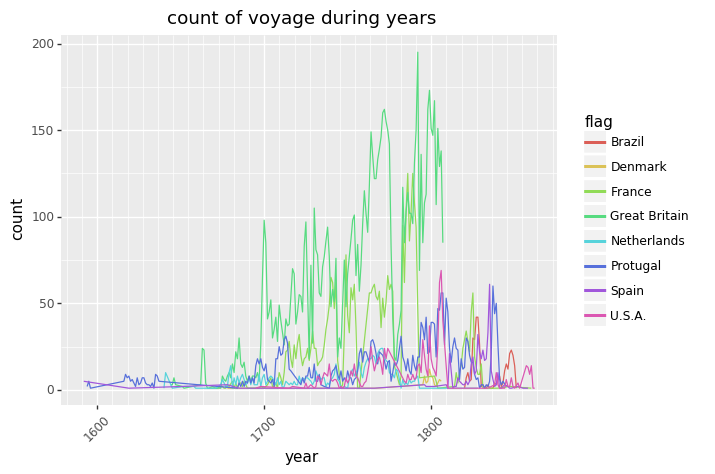

<ggplot: (-9223372029298901879)>

In [12]:
# 4
# plot the data
p9.ggplot(ungroup) \
+ p9.aes('year', 'count',group='flag',color='flag') \
+ p9.geom_line() \
+ p9.theme(axis_text_x = p9.themes.element_text(rotation=45)) \
+ p9.scales.scale_x_continuous(minor_breaks=10) \
+ p9.labels.ggtitle('count of voyage during years')

5. 
In this plot, I used geom_line() to plot the continuous line of count vs year. For the aes mapping, I use the mapping of year to x and count to y to represent the relationship between voyage count and year. Besides that, I also used group to group the class of countries, and I plot them in different colors.   
I also used theme() to tilt the x text and rescale the x using scales.

6. Around year 1790, the voyage of Great Britain drops rapidly from around 200 to 60. It is due to the congressional debate over slavery, where Benjamin Franklin, submitted to Congress a petition to end the importation of slaves.

**Exercise 4.** Looking at some of these ships.

1. Search for the slave ship mentioned in the following wikipedia article: https://en.wikipedia.org/wiki/Brookes_(ship) Hint: Look at all records of ships with 'Brook' in the name and try to match the characteristics to those described.  How many voyages for this ship are in the data (try to exclude ships with the same name)?
2. Create a variable that is True if there was a resistance (like a slave revolt) on the ship.  Plot the density of ships as a function of year with and without revolts and compare these distributions.
3. The movie Amistad was based on a real slave ship and slave uprising.  Read about it here: https://en.wikipedia.org/wiki/La_Amistad  Try to find this ship by searching for it by name and also searching for ships in the same 10 year period as this event with a slave resistance.  If you think you found it describe it, otherwise describe the events of another voyage that you did find.  

In [13]:
# 1
#try to find the name
shipname = df['shipname'].fillna(' ')
ship_index = [i for i, name in shipname.items() if 'Brook' in name]
df_shipname = df.iloc[ship_index,:]
df_shipname[['ownera','ownerb','ownerc', 'ownerd','tslavesd','slaarriv']]
#Brooks, Joseph (Jr)

,ownera,ownerb,ownerc,ownerd,tslavesd,slaarriv
13038,"Cowley, James*","Brooks, Roger*",NaN,NaN,NaN,245.0
14199,"Cowley, James*",NaN,NaN,NaN,NaN,275.0
14341,NaN,NaN,NaN,NaN,250.0,NaN
29530,"Thompson, William","Clough, Samuel","Bennett, Edward",NaN,NaN,337.0
29531,"Thompson, William","Clough, Samuel","Bennett, Edward","Ratcliffe, Jonathan",NaN,335.0
29532,"Thompson, William","Clough, Samuel","Bennett, Edward","Ratcliffe, Jonathan",NaN,340.0
29533,"Ratcliffe, Jonathan",NaN,NaN,NaN,NaN,199.0
29534,"Brooks, Joseph (Jr)","Staniforth, Thomas","Rumbold, Thomas","Ingram, Francis",650.0,646.0
29535,"Noble, Clement","Staniforth, Thomas","Brooks, Joseph (Jr)","Ingram, Francis",619.0,586.0
29536,"Noble, Clement","Staniforth, Thomas","Brooks, Joseph (Jr)","Ingram, Francis",740.0,635.0


According to wiki, when the measurements were taken the ship held 638 persons, the next journey 744, and the journey following the measurements, 609. We can find that Joseph Brooks has four matches. One voyage carried 650 slaves which roughly matches the 638 on record, one carried 619, and the third voyage carried 740 which matches 744, and another voyage carried 609 slaves which exactly matches the 609 on record.

In [14]:
# 2
#preprocess the data
revoltdata = df[df['Date_dep'].notna()]
revoltdata['year'] = [i[2] for i in[s.split('/') for s in revoltdata['Date_dep']]]
revoltdata['year'] = pd.to_numeric(revoltdata['year'])
revoltdata['isresist'] = revoltdata['resistance'].notna()

In [15]:
revoltdata['isresist'].sum()

429

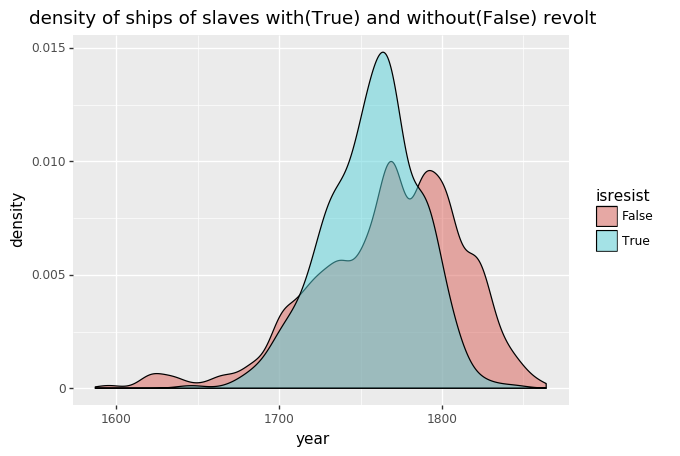

<ggplot: (7557166891)>

In [16]:
# plot the graph
p9.ggplot(revoltdata) \
+p9.aes('year',fill='isresist') \
+p9.geom_density(alpha=.5) \
+p9.labels.ggtitle("density of ships of slaves with(True) and without(False) revolt")

Comparison: we can see that around 1750, the revolt happened more frequent than other years. It is the year when a ships revolt more often compared with non-revolt ships than other years. The revolt is normal distribution, and the non revolt is a little bit left skewed. 

In [17]:
# 3
# preprocess the data
df_4_3 = df[['shipname','Date_dep','rig','tslavesd','slaarriv','resistance','plac1tra','sla1port','fate','fate2']]
df_4_3 = df_4_3[df['Date_dep'].notna()]
df_4_3['year'] = [int(i[2]) for i in[s.split('/') for s in df_4_3['Date_dep']]]
namedf = df_4_3[df_4_3['shipname'].str.contains('Amistad',na=False,case=False)]
rigdf = namedf[namedf['rig'] == 2.0]
rigdf

,shipname,Date_dep,rig,tslavesd,slaarriv,resistance,plac1tra,sla1port,fate,fate2,year
769,Amistad Habanera,12/4/1828,2.0,NaN,300.0,NaN,NaN,31312.0,1.0,1.0,1828
935,Amistad Habanera,6/14/1829,2.0,NaN,NaN,NaN,NaN,31399.0,1.0,1.0,1829
1278,Amistad Habanera,2/4/1833,2.0,NaN,NaN,NaN,NaN,31313.0,1.0,1.0,1833


I didn't find the ship but I find a ship called Amistad Habanera that travels to Havana to sell 300 slaves. It completed the voyage. 

**Exercise 5.** Other patterns.

1. The arrival and departure locations are quite detailed.  Look in the appendix of the codebook for the location codes.  Make a coarser version of both arrival and departure port variables (select just the last departure and first arrival) so that for example,  
```
30000 Caribbean 36100 Martinique 36101 Fort-Royale
```
is just encoded as '3' or Caribbean.
2. Plot the trend of voyages as a function of arrival location.  What trends do you see?
3. Do the same for departure location.
4. Plot the ratio of captives that are men as a function of year.  Include a smoother to describe the over all trend.  Also include in the plot another possible confounding variable.
5. Describe the geoms, aesthetic mappings, and other aspects of the plot.

I use npafttra(Port of call before Atlantic crossing) as last departure port and sla1port as first arrival port.

In [18]:
# 1
#preprocess the data
port = df[['npafttra','sla1port']]
port.columns = ['departure', 'arrival']
port = port // 10000
port_arrival = port[port['arrival'].notna()]
port_departure = port[port['departure'].notna()]

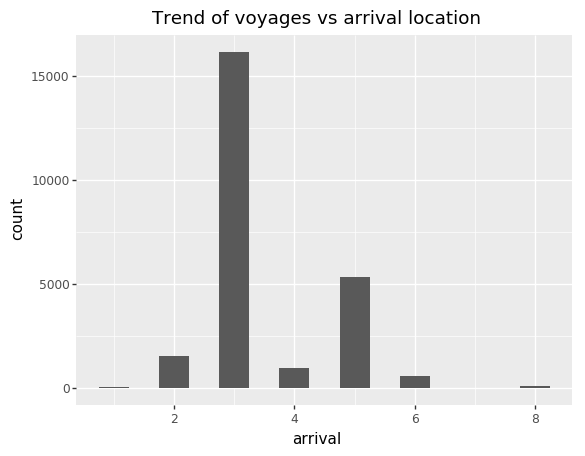

<ggplot: (-9223372029297639294)>

In [19]:
# 2
#plot the data
p9.ggplot(port_arrival) \
+p9.aes('arrival') \
+p9.geom_histogram(alpha=1,binwidth=0.5) \
+p9.labels.ggtitle('Trend of voyages vs arrival location')

I see that a lot slaves landed on Carribean and less slaves landed on other lands.

In [20]:
#4
#preprocess the data
men_ratio = df[df['Date_dep'].notna()]
#men_ratio.dropna(inplace=True)
men_ratio['year'] = [i[2] for i in[s.split('/') for s in men_ratio['Date_dep']]]
men_ratio['year'] = pd.to_numeric(men_ratio['year'])
men_ratio = men_ratio[men_ratio['menrat7'].notna()]

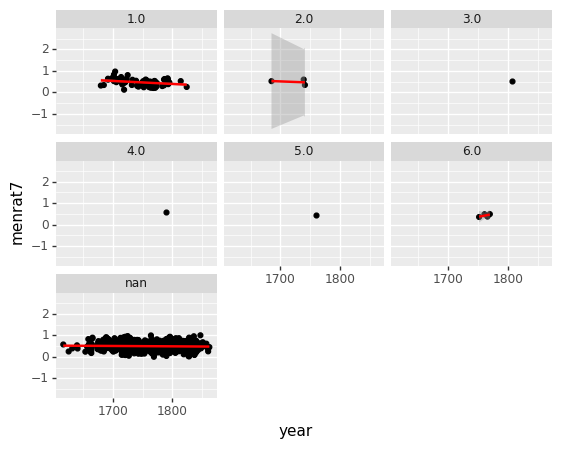

<ggplot: (-9223372036577373089)>

In [21]:
#plot the data
p9.ggplot(men_ratio) \
+p9.aes('year','menrat7')\
+p9.geom_point() \
+p9.facet_wrap('resistance')\
+p9.stat_smooth(method='lm',color='red') \

I used 'year' as x and 'menrat7' as y for mapping. I use geom_point to plot the scattor polot and facet wrap to seperate data in terms of 'resistence'. I also used a stat_smooth to smooth the line where the parameter is 'lm' for linear regression and 'red' for line color

Another confounding variable is resistance.

**Exercise 6.** Estimating total captives count I.

1. Plot the number of slaves at departure from last slaving and the number that arrived at the first port of disembarkation.  
2. Why do these variables concentrate near a line?  Most of the data lies on one side of the line, but a small fraction do not, what could have happened for those that did not?  Separate the data into these two populations.
3. For those voyages where the number of captives decreased (through death), calculate a death rate (ratio of captives that died).  
4. Plot this death rate as a function of year.  Make any appropriate scale transformations, and include a trend line or other smoother.  What is your interpretation?
5. Guess at two possible predictors and create visualizations that give you a sense of their association with the death rate.  Make sure that one of these is categorical, and plot it with the death rate and year so that there are three variables used in the same plot.
6. For these plots, list the geoms, aesthetic mappings, scales, and other notable aspects used.

In [22]:
# 1
# select columns and filter groups
daslave = df[['tslavesd','slaarriv','Date_dep','resistance','crewdied']]
#daslave[daslave['slaarriv'].notna() & daslave['tslavesd'].notna() & daslave['Date_dep'].notna()]
daslave.dropna(subset=['slaarriv', 'tslavesd','Date_dep'],inplace=True)
daslave['small'] = daslave['slaarriv'] > daslave['tslavesd']

/Users/jixingwei/anaconda3/lib/python3.6/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Users/jixingwei/anaconda3/lib/python3.6/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


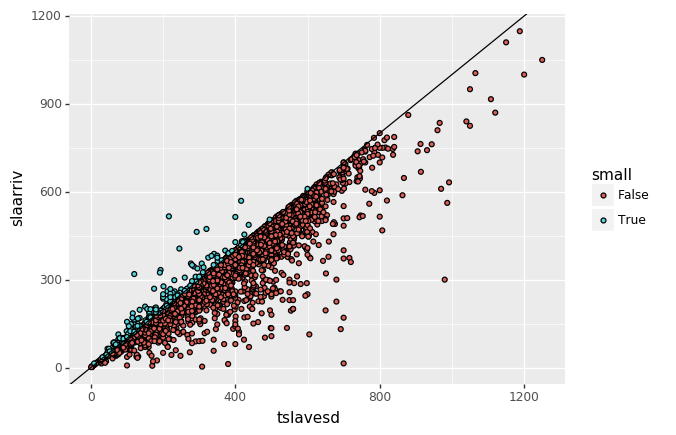

<ggplot: (-9223372029297672560)>

In [23]:
p9.ggplot(daslave) + p9.aes(x='tslavesd',y='slaarriv',fill='small') + p9.geom_point() \
+ p9.geoms.geom_abline(mapping=p9.aes(slope=1,intercept=0)) \

2. These variables concentratenear a line because the more slaves depatured, the more slaves arrived. The death rate for most of ships is one. For those data above the line, they are either outliers or captain captured more slaves along the way.

In [24]:
daslave.head()

,tslavesd,slaarriv,Date_dep,resistance,crewdied,small
11,640.0,542.0,12/18/1816,NaN,NaN,False
16,599.0,545.0,7/15/1816,NaN,NaN,False
17,463.0,459.0,8/7/1816,NaN,NaN,False
18,519.0,457.0,7/31/1816,NaN,NaN,False
19,614.0,598.0,9/2/1816,NaN,NaN,False


In [25]:
# 3
#preprocess the data and group the data by year
daslave['year'] = [i[2] for i in[s.split('/') for s in daslave['Date_dep']]]
daslave['year'] = pd.to_numeric(daslave['year'])
describe = daslave.groupby(['year']).describe()
describe.head()

crewdied                                   resistance                   \
        count mean std  min  25%  50%  75%  max      count mean std min 25%   
year                                                                          
1604      0.0  NaN NaN  NaN  NaN  NaN  NaN  NaN        0.0  NaN NaN NaN NaN   
1616      0.0  NaN NaN  NaN  NaN  NaN  NaN  NaN        0.0  NaN NaN NaN NaN   
1617      0.0  NaN NaN  NaN  NaN  NaN  NaN  NaN        0.0  NaN NaN NaN NaN   
1618      0.0  NaN NaN  NaN  NaN  NaN  NaN  NaN        0.0  NaN NaN NaN NaN   
1621      1.0  7.0 NaN  7.0  7.0  7.0  7.0  7.0        0.0  NaN NaN NaN NaN   

                 slaarriv                                                   \
     50% 75% max    count    mean        std    min     25%    50%     75%   
year                                                                         
1604 NaN NaN NaN      1.0  215.00        NaN  215.0  215.00  215.0  215.00   
1616 NaN NaN NaN      5.0  150.20  33.655609  119.0  120.00  149.0  163.00   
1617 NaN NaN NaN      4.0  145.25  39.449335  111.0  120.00  135.0  160.25   
1618 NaN NaN NaN      4.0  174.25  36.142081  131.0  155.75  174.5  193.00   
1621 NaN NaN NaN      2.0  136.00  31.112698  114.0  125.00  136.0  147.00   

            tslavesd                                                          
        max    count   mean         std    min     25%    50%     75%    max  
year                                                                          
1604  215.0      1.0  308.0         NaN  308.0  308.00  308.0  308.00  308.0  
1616  200.0      5.0  197.8   35.273219  166.0  180.00  186.0  200.00  257.0  
1617  200.0      4.0  245.0   88.128694  150.0  187.50  240.0  297.50  350.0  
1618  217.0      4.0  323.5  104.436584  230.0  275.00  295.5  344.00  473.0  
1621  158.0      2.0  308.5   89.802561  245.0  276.75  308.5  340.25  372.0

In [26]:
#calculate the deathrate
groupdf = pd.DataFrame()
groupdf['year'] = describe['slaarriv'].index
groupdf['arrive'] = (describe['slaarriv']['count'] * describe['slaarriv']['mean']).values
groupdf['depart'] = (describe['tslavesd']['count'] * describe['tslavesd']['mean']).values
groupdf['deathrate'] = (-groupdf['arrive'] + groupdf['depart']) / groupdf['depart']

In [27]:
groupdf.head()

,year,arrive,depart,deathrate
0,1604,215.0,308.0,0.301948
1,1616,751.0,989.0,0.240647
2,1617,581.0,980.0,0.407143
3,1618,697.0,1294.0,0.461360
4,1621,272.0,617.0,0.559157


/Users/jixingwei/anaconda3/lib/python3.6/site-packages/plotnine/stats/smoothers.py:146: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"


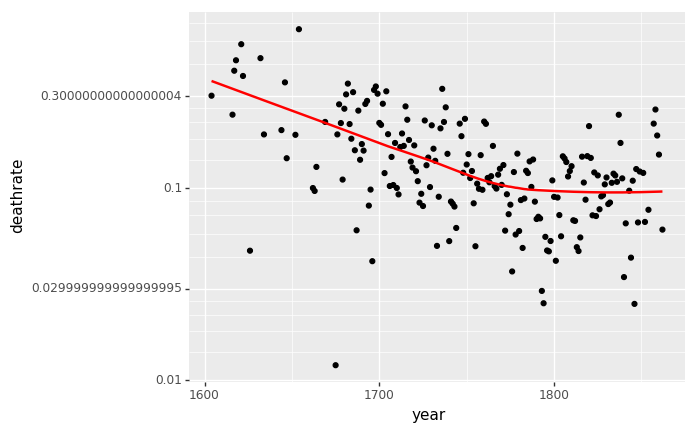

<ggplot: (7555877226)>

In [28]:
#4
p9.ggplot(groupdf) + p9.aes(x='year',y='deathrate') + p9.geom_point() \
+p9.stat_smooth(method='lowess',color='red') +p9.scale_y_log10()

Overall, the deathrate decreases as year increases.

In [29]:
#5
#construction dataframe and calculate deathrate
df5 = pd.DataFrame(data=revoltdata)
df5['deathrate'] = (df5['tslavesd'] - df5['slaarriv'])/df5['tslavesd']

In [30]:
df5.dropna(subset=['deathrate','crewdied'],inplace=True)

/Users/jixingwei/anaconda3/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_point : Removed 45 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


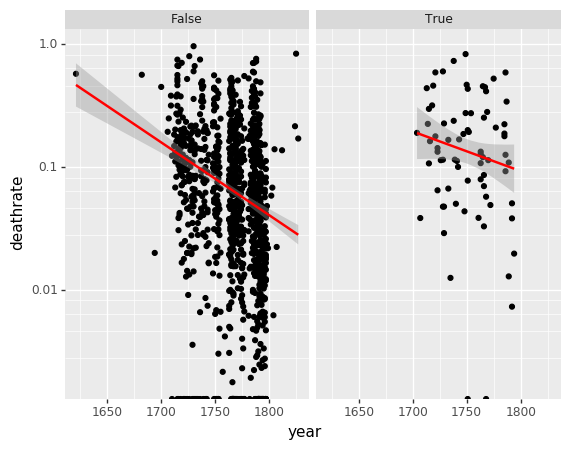

<ggplot: (-9223372029297521229)>

In [31]:
p9.ggplot(df5) \
+p9.aes('year','deathrate') \
+p9.geom_point() \
+p9.scale_y_log10() \
+p9.facet_wrap('isresist') \
+p9.stat_smooth(color='red')

The two predictor variables are resistance and crewdied.      
The p9 element i used are:    
* p9.ggplot + p9.aes + p9.geom_point()+p9.geoms.geom_abline(mapping=p9.aes()) 
* p9.stat_smooth(method='lowess',color='red') + p9.scale_y_log10()
* p9.facet_wrap('isresist') 

**Exercise 7.** Estimating total captives count II.

1. Using the variables selected, fit a prediction of death rate using linear regression and some simple transformations/scales.  You do not need to spend time doing automated model selection, just include the most likely predictor or predictors from the previous question.
2. We will impute the number of captives on board at departure, so enumerate the cases for missingness of the variables involved in the prediction.
3. We would like to predict the number of captives on departure from the number that arrived with the following formula,
$$
\textrm{arrived} = \pi (1 - \textrm{death rate}) \cdot (\textrm{captives taken}) + (1- \pi) (\textrm{average increase})
$$
where $\pi$ is the proportion of voyages with no increase in captives, and the average increase is over those that did see an increase. 
For those voyages with captives taken missing and arrived not missing, use the estimated death rate to predict the captives taken.
4. Impute the remainder by predicting the captives taken with the year variable, you can use simple linear regression.
5. With the same formula and method impute the number of captives upon arrival whenever it is missing.
6. Give a new estimate of the predicted total number of captives taken on the middle passage, the total number of deaths, and the overall death rate.  How does this differ from your first estimate obtained by assuming MCAR?

### 1

Since I modified the original dataframe, I will have to reread them and repreocess the data.

In [41]:
predictdf = pd.read_csv('tastdb-2010.csv', encoding='iso-8859-1',na_values=' ')

In [42]:
# preprocess the data
predictdf.dropna(subset=['Date_dep','crewdied'],inplace=True)
predictdf['year'] = [int(i[2]) for i in[s.split('/') for s in predictdf['Date_dep'] if pd.notnull(s)]]
predictdf['isresist'] = predictdf['resistance'].notna()
predictdf['deathrate'] = (predictdf['tslavesd'] - predictdf['slaarriv']) / predictdf['tslavesd']
train = predictdf.dropna(subset=['deathrate','crewdied'])
predictdf = predictdf.reset_index(drop=True)

In [43]:
#1
#create the model and train the model
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(train[['year','isresist','crewdied']],train['deathrate'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
model.coef_

array([-0.00067141,  0.05969234,  0.00672256])

### 2

Using year, resistance and crewdied a to predict the deathrate. Then using arrived population to predict captives taken population. If the captives populations are missing, we will use formular to estimate it.   
Variable we will use:   
* year
* isresist
* crewdied
* deathrate
* arrived(slaarriv)
* captives taken(tslavesd)

In [45]:
#2
print('the amount of missing value for year is {} \nthe amount of missing value for isresist is {} \nthe amount of missing value for drewdied is {} \nthe amount of missing value for deathrate is {} \nthe amount of missing value for slaarriv is {} \nthe amount of missing value for tslavesd is {}'.format(predictdf['year'].isna().sum(),
        predictdf['isresist'].isna().sum(),
        predictdf['crewdied'].isna().sum(),
        predictdf['deathrate'].isna().sum(),
        predictdf['slaarriv'].isna().sum(),
        predictdf['tslavesd'].isna().sum())
      
)

the amount of missing value for year is 0 
the amount of missing value for isresist is 0 
the amount of missing value for drewdied is 0 
the amount of missing value for deathrate is 3150 
the amount of missing value for slaarriv is 1103 
the amount of missing value for tslavesd is 2763


I drop the NaNs that are in the year, isresist and crewdied because I won't be able to predict the deathrate if these data are missing

In [46]:
#3

# predict the deathrate for the missing values
pmissing = predictdf['deathrate'].isna()
for i,_ in predictdf[pmissing].iterrows():
    p = model.predict(predictdf.iloc[i,][['year','isresist','crewdied']].values.reshape(1,3))
    predictdf.loc[i,'deathrate'] = p[0]

In [47]:
# calculate pi and average increase
pnona = predictdf[['tslavesd','slaarriv']].dropna()
pi = (pnona['tslavesd'] >= pnona['slaarriv']).sum()/pnona.count()
inc = pnona[pnona['tslavesd'] < pnona['slaarriv']]
av_in = (inc['slaarriv'] - inc['tslavesd']).sum()/inc.count()
pi, av_in = pi[0],av_in[0]

In [48]:
# finding the missing value's index
tsmissing_slano_index = predictdf[predictdf['slaarriv'].notna() & predictdf['tslavesd'].isna()].index

In [49]:
#iterate through datafram and replace nans with predicted value
for i in tsmissing_slano_index:
    predictdf.loc[i,['tslavesd']] = (predictdf.loc[i,['slaarriv']][0] - (1-pi)*av_in) / (pi * (1-predictdf.loc[i,['deathrate']][0]))

In [50]:
#4
#finding the missing index and create the data frame with missing index
tsmissing_slamissing_index = predictdf[predictdf['slaarriv'].isna() & predictdf['tslavesd'].isna()].index

temp = predictdf.loc[tsmissing_slamissing_index,['slaarriv','tslavesd']]

temp.head()

,slaarriv,tslavesd
7,NaN,NaN
25,NaN,NaN
30,NaN,NaN
31,NaN,NaN
40,NaN,NaN


In [51]:
#create and train the model
train_y = predictdf['tslavesd'].dropna()
train_y_index = train_y.index
train_y = predictdf['tslavesd'].dropna().values.reshape(3686,1)
train_x = predictdf['year'][train_y_index].values.reshape(3686,1)
temp_model = LinearRegression()
temp_model.fit(train_x, train_y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [52]:
#iterate through datafram and replace nans with predicted value
for i in temp.index:
    temp_array = np.asarray(predictdf.loc[i,'year'])
    temp_array = temp_array.reshape(1,1)
    predictdf.loc[i,'tslavesd'] = temp_model.predict(temp_array)[0]

In [53]:
#5
#iterate through datafram and replace nans with predicted value
for i in temp.index:
    predictdf.loc[i,'slaarriv'] = pi*(1-predictdf.loc[i,'deathrate'])*predictdf.loc[i,'tslavesd'] + (1 - pi)*av_in

In [54]:
predictdf.loc[temp.index,['slaarriv','tslavesd']].head()

,slaarriv,tslavesd
7,298.988223,334.310301
25,268.271533,337.371937
30,250.657847,353.878146
31,215.172630,342.297177
40,288.708461,341.897833


In [64]:
#6
#calculate the total captive, arrives, death and deathrate
total_captive = predictdf['tslavesd'].sum() 
total_arrival = predictdf['slaarriv'].sum() 
total_death = total_captive - total_arrival
death_rate = predictdf['deathrate'].mean()

In [65]:
print('the total captive is {}\n the total arrival is {}\n the total death is {}\n the overall death rate is {}'.format(total_captive,total_arrival,total_death,death_rate))

the total captive is 1466312.423195808
 the total arrival is 1179538.7197814877
 the total death is 286773.70341432025
 the overall death rate is 0.09708290331982643


It's a lot more less than what I haved predicted at first. It is because here I dropped some samples with year, deathrate and crewdied which contains NaN that will prevent from training. Also the predictor of deathrate is not idea, it is not that accurate.   


So I added the mean to the rest of the voyage that is missing and the total now is reasonable:

In [66]:
#calculate the total captive, arrives, death and deathrate with means
total_captive = predictdf['tslavesd'].sum() + (len(df) - len(predictdf))*predictdf['tslavesd'].mean()
total_arrival = predictdf['slaarriv'].sum() + (len(df) - len(predictdf))*predictdf['slaarriv'].mean()
total_death = total_captive - total_arrival
death_rate = predictdf['deathrate'].mean()

In [67]:
print('the total captive is {}\n the total arrival is {}\n the total death is {}\n the overall death rate is {}'.format(total_captive,total_arrival,total_death,death_rate))

the total captive is 11638896.496793425
 the total arrival is 10151377.564963758
 the total death is 1487518.9318296667
 the overall death rate is 0.09708290331982643
